<a href="https://colab.research.google.com/github/ajit-rajput/misc-notebooks/blob/main/MINST_Feedfoward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Classify handwritten digits from the MNIST dataset using a feedforward neural network.

## Load and preprocess the mnist dataset

### Subtask:
Load the MNIST dataset, normalize the pixel values, and reshape the data for the neural network.


**Reasoning**:
Load the MNIST dataset, normalize the pixel values, and reshape the data for the neural network as instructed.



In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data
x_train = x_train.reshape((x_train.shape[0], np.prod(x_train.shape[1:])))
x_test = x_test.reshape((x_test.shape[0], np.prod(x_test.shape[1:])))

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


## Build the feedforward neural network model

### Subtask:
Design a simple feedforward neural network model using Keras or another deep learning library.


**Reasoning**:
Design a simple feedforward neural network model using Keras based on the instructions provided, including importing necessary modules, initializing the model, adding dense layers with specified units and activation functions, and printing the model summary.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize a Sequential model
model = Sequential()

# Add the first Dense layer with input shape
model.add(Dense(128, activation='relu', input_shape=(784,)))

# Add a second Dense layer
model.add(Dense(64, activation='relu'))

# Add a second Dense layer
model.add(Dense(32, activation='relu'))

# Add the output Dense layer
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

### Subtask:
Configure the model for training by specifying the optimizer, loss function, and metrics.


**Reasoning**:
Configure the model for training by compiling it with the specified optimizer, loss function, and metrics.



In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


## Train the model

### Subtask:
Train the model using the training data and validate it using the test data.


**Reasoning**:
Train the compiled model using the training data and validate it using the test data.



In [ ]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8397 - loss: 0.5592 - val_accuracy: 0.9566 - val_loss: 0.1466
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9621 - loss: 0.1276 - val_accuracy: 0.9676 - val_loss: 0.0999
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9749 - loss: 0.0837 - val_accuracy: 0.9708 - val_loss: 0.0958
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9802 - loss: 0.0614 - val_accuracy: 0.9711 - val_loss: 0.0921
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9848 - loss: 0.0483 - val_accuracy: 0.9738 - val_loss: 0.0888
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0384 - val_accuracy: 0.9734 - val_loss: 0.0912
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9894 - loss: 0.0339 - val_accuracy: 0.9752 - val_loss: 0.0859
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9913 - loss: 0.0270 - val_accuracy: 0

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the test data and report the accuracy.


**Reasoning**:
Evaluate the trained model on the test data to get the loss and accuracy and then print the results.



In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the test loss and test accuracy
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0848
Test Accuracy: 0.9797


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


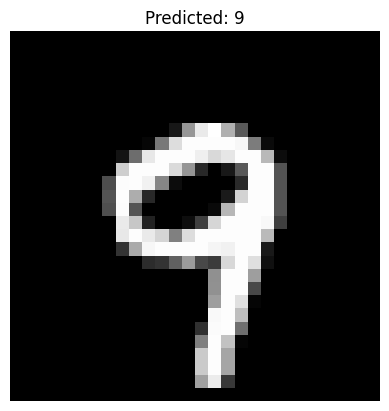

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image_index = 5456

# Predict one image
sample = x_test[image_index]
# Reshape the sample to include a batch dimension
sample = sample.reshape(1, -1)
prediction = model.predict(sample)
predicted_label = np.argmax(prediction)

# Display
plt.imshow(x_test[image_index].reshape(28, 28), cmap="gray") # Reshape back to original image dimensions for display
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()

## Summary:

### Data Analysis Key Findings

*   The MNIST dataset was successfully loaded, normalized, and reshaped into a flattened format of 784 features per image. The training data (`x_train`) has a shape of (60000, 784) and the test data (`x_test`) has a shape of (10000, 784).
*   A simple feedforward neural network model was built using Keras, consisting of three dense layers with ReLU activation for the hidden layers and softmax activation for the output layer, designed for 10 classes.
*   The model was compiled using the Adam optimizer, 'sparse\_categorical\_crossentropy' as the loss function, and 'accuracy' as the evaluation metric.
*   The model was trained for 10 epochs with a batch size of 64. The training history shows that the validation accuracy improved over the initial epochs before stabilizing, while training accuracy continued to increase, suggesting potential overfitting.

### Insights or Next Steps

*   The current model shows signs of overfitting. Techniques like adding dropout layers, implementing early stopping, or using regularization could be explored to mitigate this.
*   Further analysis of the training history, including plotting the training and validation loss and accuracy curves, would provide clearer insights into the model's performance and help determine if more epochs are needed or if training should be stopped earlier.
